In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
sns.set()

## 1. Importing The Data 

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 2. Data Preprocessing 

In [4]:
# checking missing value 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# chcking duplicate value 
data.duplicated().sum()

1081

In [6]:
data = data.drop_duplicates()

In [7]:
# re-checking suplicate value 
data.duplicated().sum()

0

## 3. EDA 

### a. Class

<AxesSubplot:xlabel='Class', ylabel='count'>

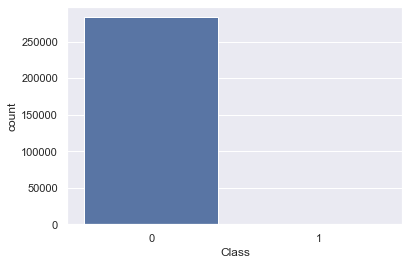

In [8]:
# checking fraud (1) and no-fraud transaction (0)
sns.countplot(data['Class'])

we have to do imbalance analysis to this data 

In [9]:
n_fraud = data['Class'].value_counts()
n_fraud

0    283253
1       473
Name: Class, dtype: int64

In [10]:
fraud_pct = (n_fraud[1]/data['Class'].count())*100
print('Fraud Percentage',round(fraud_pct,3),'%')

Fraud Percentage 0.167 %


### b. Amount

<AxesSubplot:xlabel='Amount', ylabel='Density'>

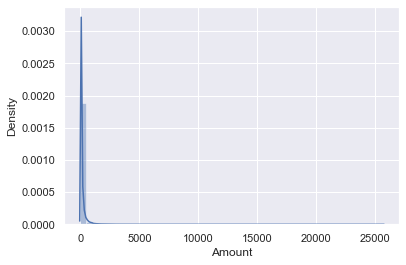

In [11]:
# checking 'Amount' distribution
sns.distplot(data['Amount'])

### c. Time 

<AxesSubplot:xlabel='Time', ylabel='Density'>

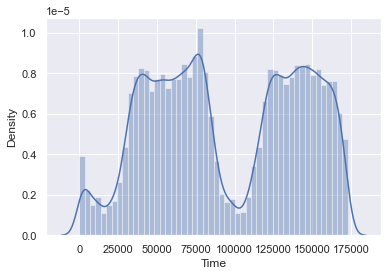

In [12]:
# Checking time distribution
sns.distplot(data['Time'])

### d. V1-V28

In [13]:
# checking distribution for every V columns 
V_col= data.drop(['Class','Amount','Time'], axis = 1)
V_col_list = V_col.columns.to_list()

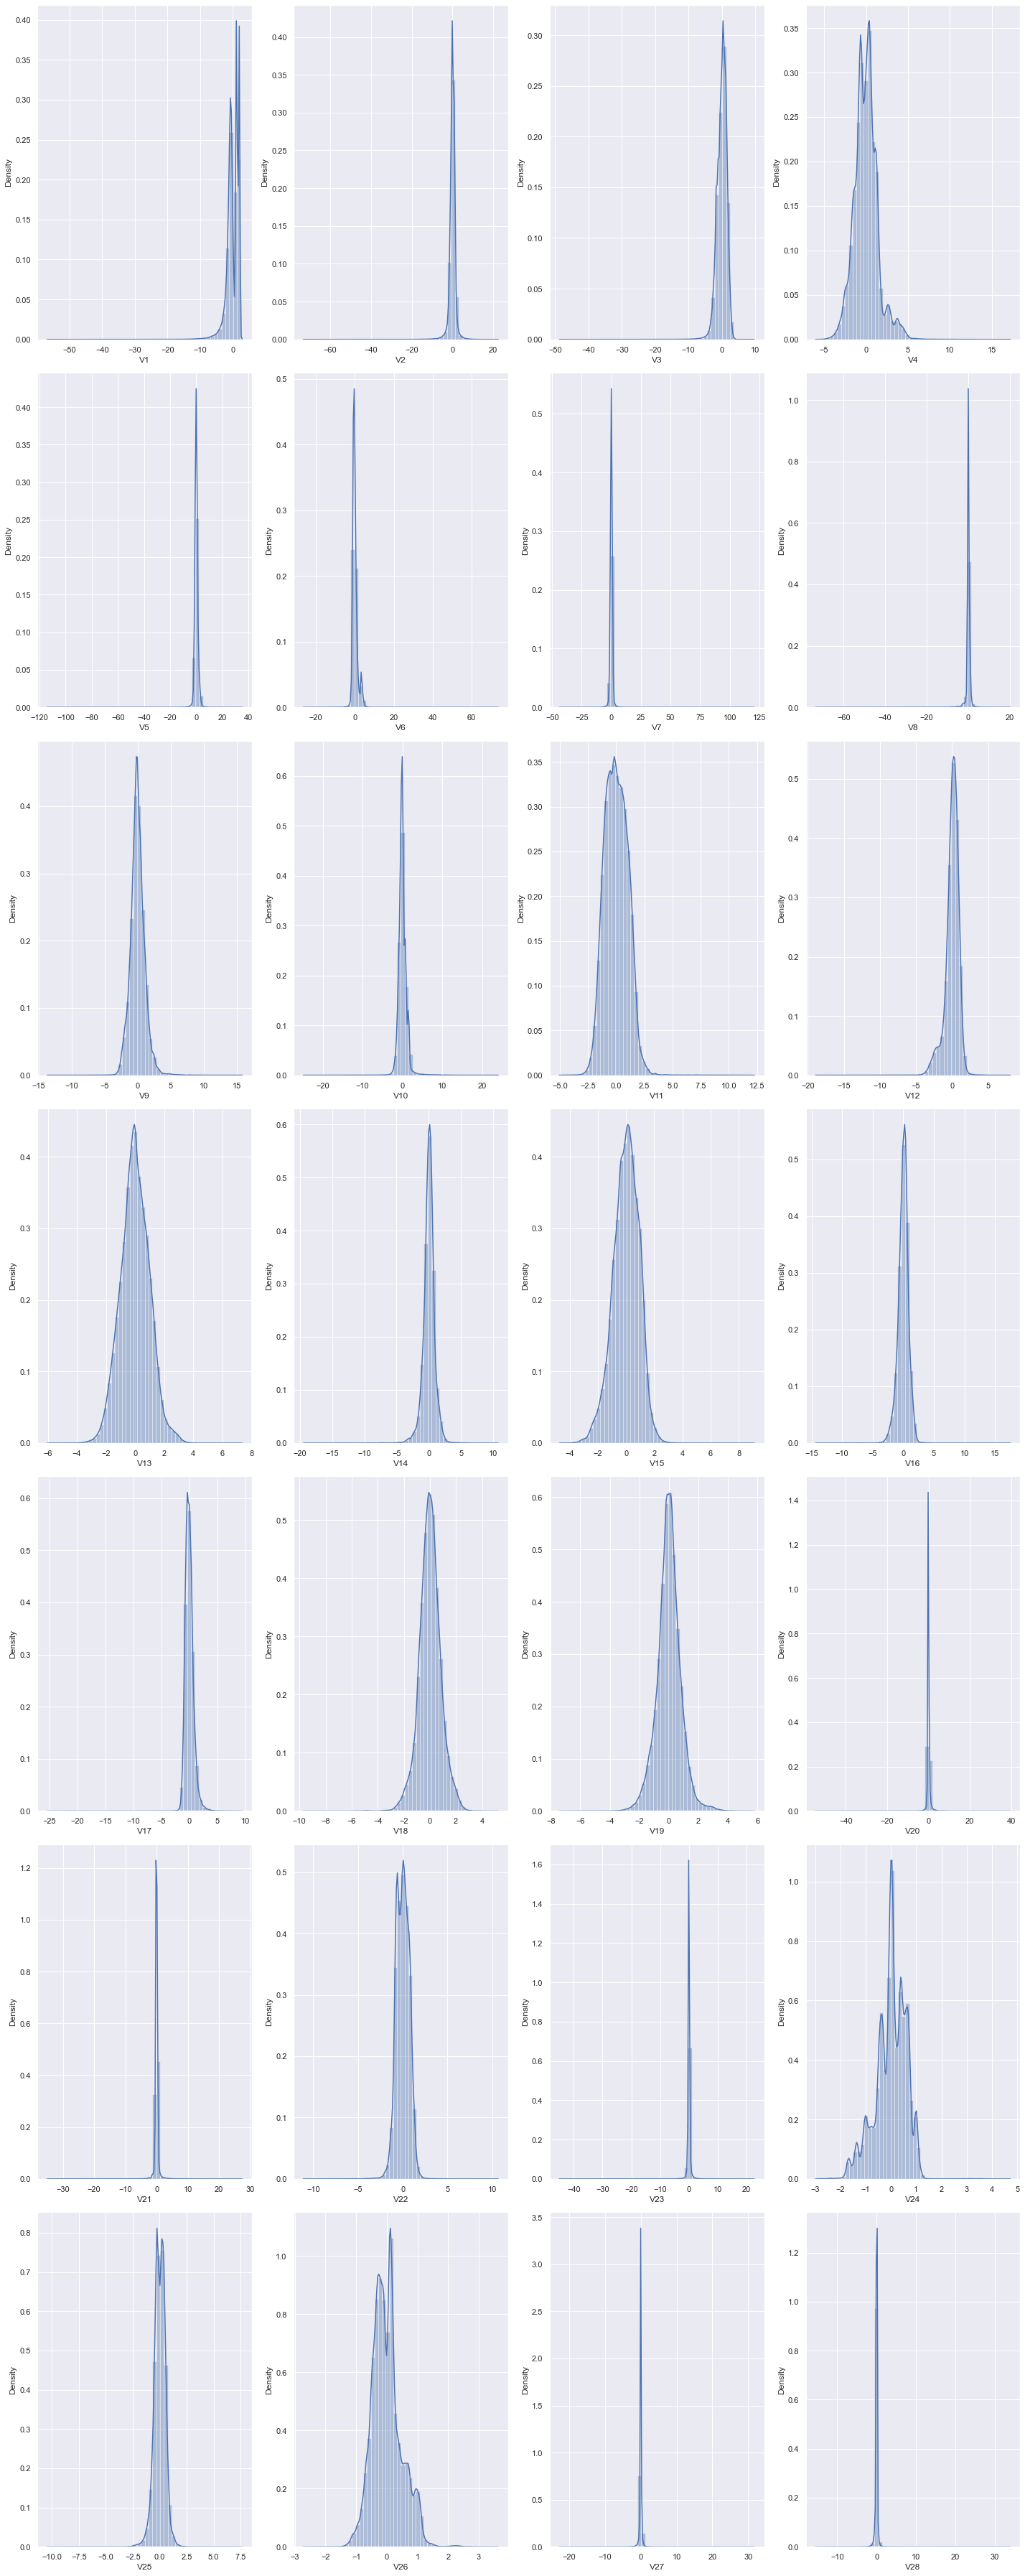

In [14]:
plt.figure(figsize=(20,50))
for i in range(0, len(V_col_list)):
    plt.subplot(7, 4, i+1)
    sns.distplot(V_col[V_col_list[i]])
    plt.tight_layout()

## 4. Correlation 

<AxesSubplot:>

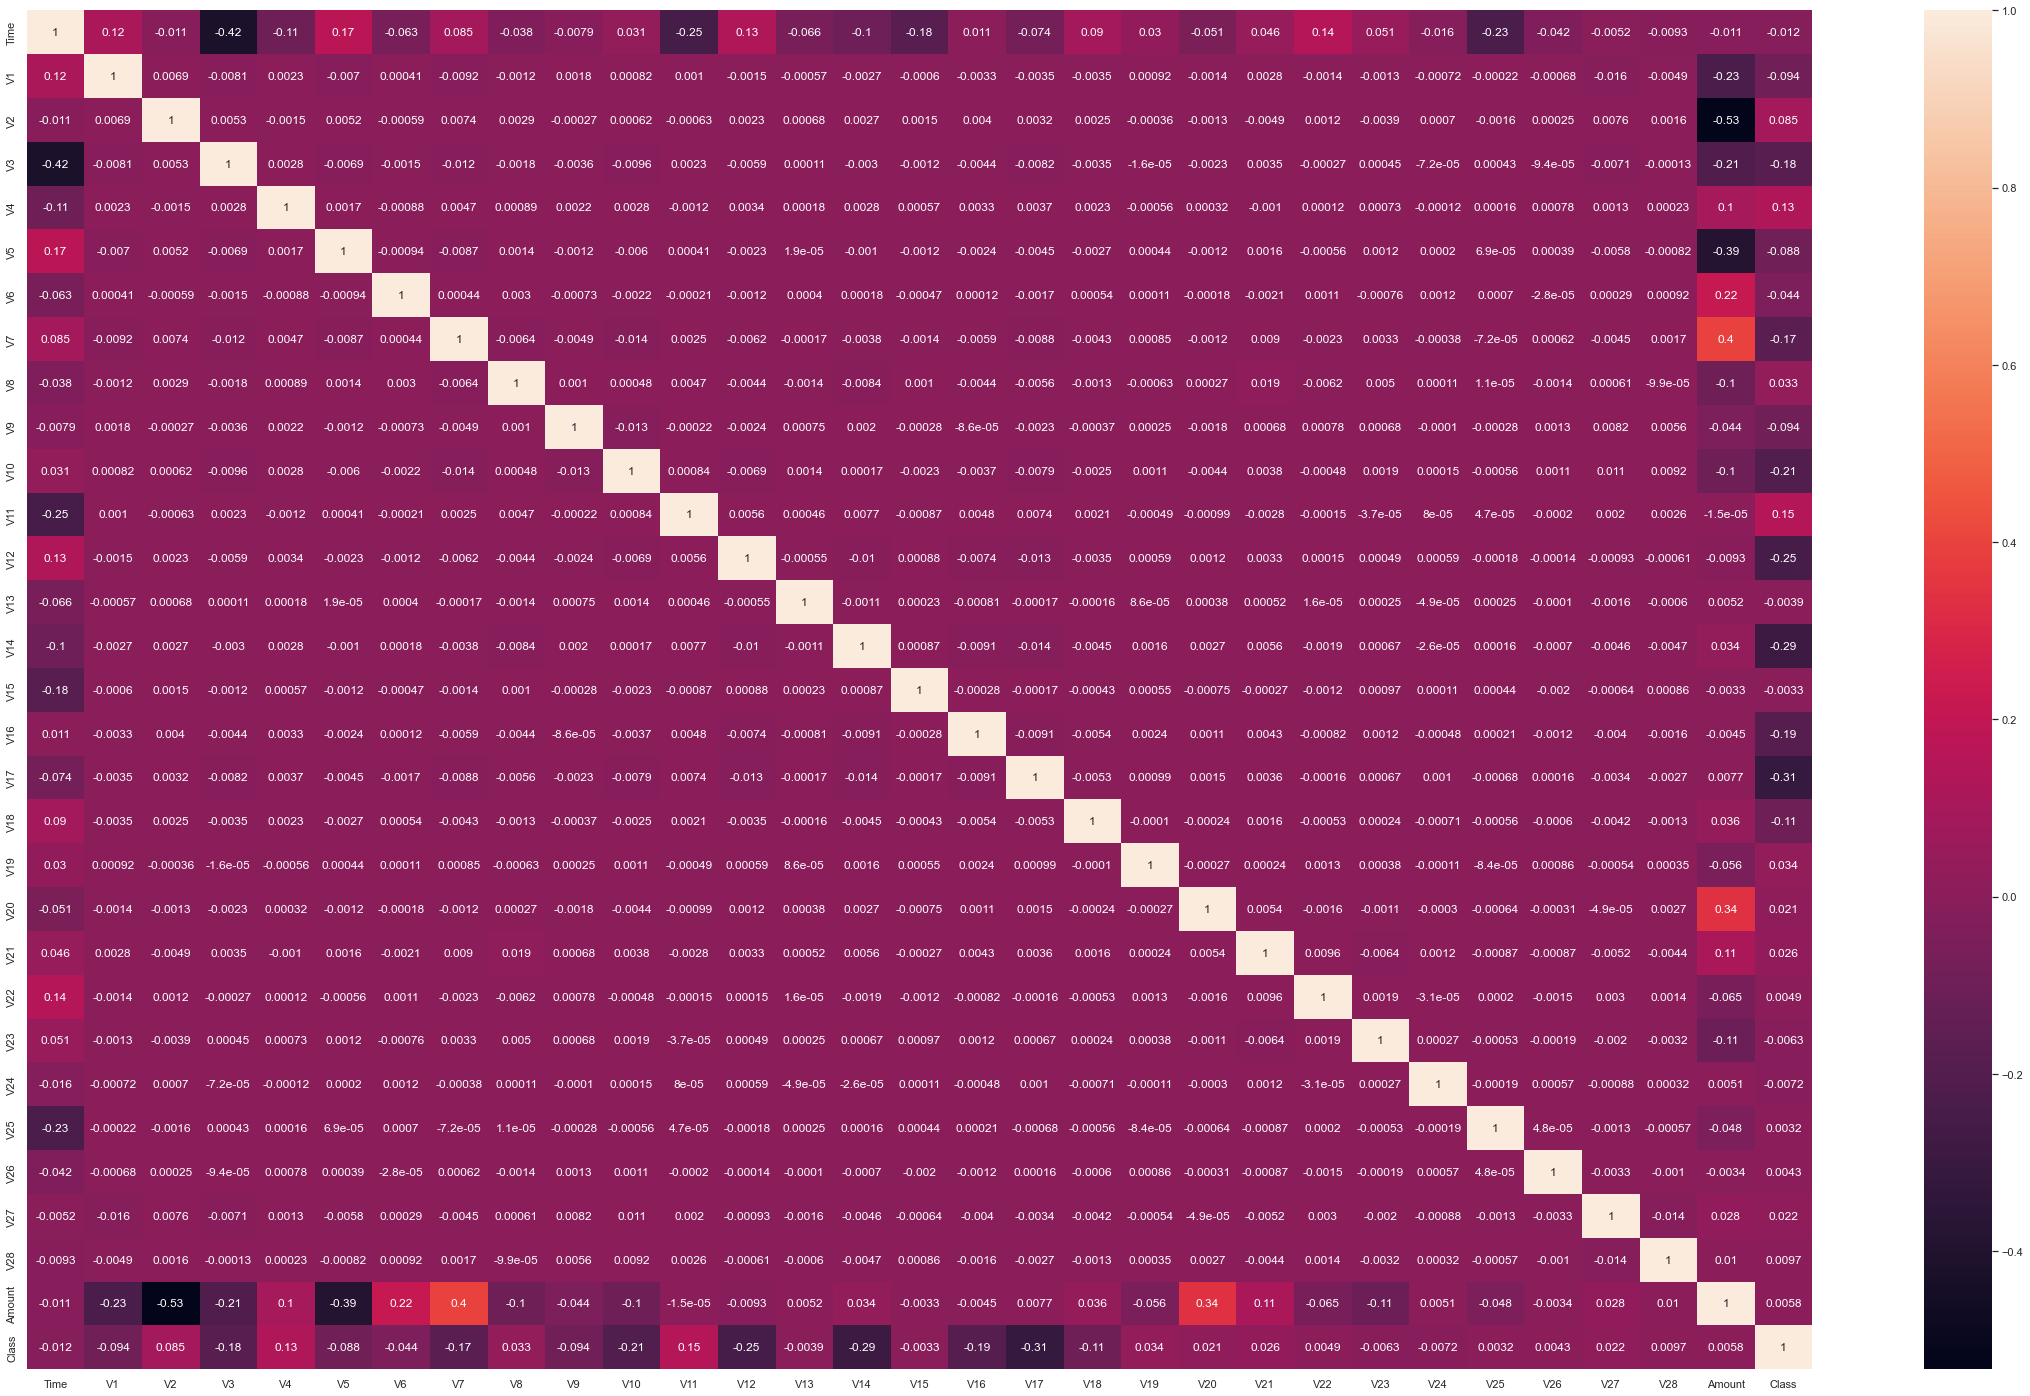

In [15]:
corr = data.corr()
# plotting heatmap 
plt.figure(figsize=(40,25))
sns.heatmap(corr, annot=True)

## 5. Feature Scalling

In [16]:
# normalize all the variables
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [17]:
# before doing a feature scalling we have to separate the input and output variable 
x = data.drop('Class', axis = 1)
y = data['Class']

In [18]:
# Feature Scalling
x_normed = mms.fit_transform(x).tolist()

## 6. Dealing With Imbalance Dataset 

<AxesSubplot:xlabel='Class', ylabel='count'>

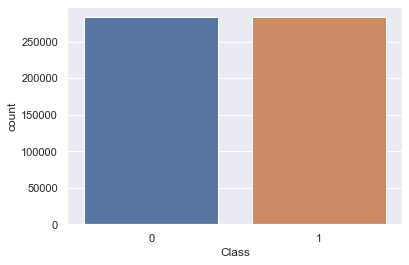

In [19]:
# trying undersample and ovrsample to find the best model 
from imblearn import over_sampling, under_sampling
# over sampling 
x_over, y_over = over_sampling.RandomOverSampler().fit_resample(x_normed,y)
# recheck number of 'Class'
sns.countplot(y_over)

<AxesSubplot:xlabel='Class', ylabel='count'>

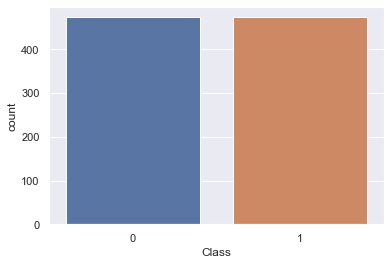

In [20]:
# under sampling 
x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x_normed,y)
# rechecking number of 'Class'
sns.countplot(y_under)

## 7. Model Training And Result 

In [44]:
# split the data into trin and test 
from sklearn.model_selection import train_test_split
# oversampling & undersampling 
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_over, y_over, random_state=52, test_size=0.5)
x_und_train, x_und_test, y_und_train, y_und_test = train_test_split(x_under, y_under, random_state=52, test_size= 0.5)

In [22]:
# using neural network 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score
n_layer = [10,20,30,40,50]

### a. oversampling 

In [25]:
rcv_over = []

for i in n_layer:
    model_over = MLPClassifier(hidden_layer_sizes = (i,), max_iter = 100) 
    model_over.fit(x_over_train, y_over_train)
    y_pred = model_over.predict(x_over_test)
    recall_score_over = recall_score(y_over_test, y_pred)
    rcv_over.append(recall_score_over)
print(rcv_over)

[0.93342405674679, 0.9522996975102769, 0.9586174315872602, 0.94184300148777, 0.977013601460976]


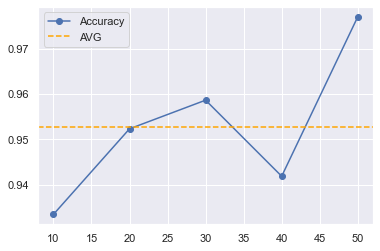

In [42]:
# plot the accuracy
plt.plot(n_layer,rcv_over, label = 'Accuracy', marker = 'o')
plt.axhline(y = np.nanmean(rcv_over), linestyle = '--', label = 'AVG', color = 'orange')
plt.legend(loc = 'upper left')
plt.show()

### b. Undersampling 

In [47]:
rcv_under = []
for i in n_layer:
    model_under = MLPClassifier(hidden_layer_sizes = (i,), max_iter = 100) 
    model_under.fit(x_und_train, y_und_train)
    y_pred = model_under.predict(x_und_test)
    recall_score_under = recall_score(y_und_test, y_pred)
    rcv_under.append(recall_score_under)
print(rcv_under)

[0.7531380753138075, 0.8075313807531381, 0.7824267782426778, 0.8117154811715481, 0.8368200836820083]


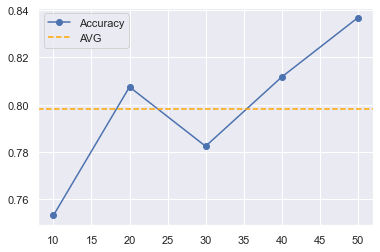

In [48]:
# plot the accuracy 
plt.plot(n_layer,rcv_under, label = 'Accuracy', marker = 'o')
plt.axhline(y = np.nanmean(rcv_under), linestyle = '--', label = 'AVG', color = 'orange')
plt.legend(loc = 'upper left')
plt.show()

conclusion : 
- the best model is data with oversmpling method that use 50 hidden layer, the accuracy score is 97.7%